In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import csv
import seaborn

# Aviation Risk Analysis

<img src="images/airplane-isolated-on-transparent-background-3d-rendering-aircraft-png-2455088391.png" alt="airplane flyting" style="width:300px;height:auto;">

## Overview 

This is our conclusion. What have we learned?

## Business Problem

A company is interested in purchasing and operating airplanes for commercial and private enterprises, but they do not know anything about the potential risks of aircraft. Our goal is to determine which aircraft are the lowest risk for the company. We want to provide actionable insights for the head of the new aviation division to decide which aircraft to purchase.

## Data


The data is from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

## Methods

Overview for risk asocited with various aircraft for out client 

## Results

## Data Understanding

In [3]:
#import and store data
df = pd.read_csv('data/AviationData.csv', encoding='mac_roman', low_memory=False)
#variables 
#made this a variable so that we can easily incorporate older data if the client would like
filter_year = 2001

In [4]:
df.shape

(88889, 31)

In [5]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,10/24/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,7/19/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,8/30/1974,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,6/19/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/9/2000
4,20041105X01764,Accident,CHI79FA064,8/2/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

We want some of these datatypes to be numbers.
We also want to filter out null and missing data.
We will have to decide which information is relevant to us.




Our first step is to ensure we are only looking at aircraft. 

In [7]:
df = df.loc[df['Aircraft.Category']=='Airplane']


Next we are removing all ameteur built aircraft as we our looking to purchase aircraft and this would be an unreasonable option. 

In [8]:
df = df.loc[df['Amateur.Built']=='No']



In [22]:
df.groupby('Make').sum()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year
Make,,,,,,
177MF LLC,1.0,0.0,2.0,0.0,0.0,2014
2021FX3 LLC,1.0,0.0,0.0,0.0,2.0,2022
3XTRIM,1.0,1.0,0.0,1.0,0.0,2015
737,0.0,0.0,0.0,0.0,329.0,4044
777,0.0,0.0,0.0,0.0,0.0,2021
...,...,...,...,...,...,...
Zenair,3.0,0.0,0.0,0.0,4.0,6044
Zlin,1.0,0.0,0.0,0.0,1.0,2018
Zlin Aviation,1.0,0.0,0.0,0.0,1.0,2020


Our next step is to filter our date ranges. We have decided to make reccomendations in a post 9-11 world and not inlcude accidents pre 2001.

In [10]:
df['Year'] = df['Event.Date'].str[-4:]
df['Year'] = df['Year'].astype(int)


In [11]:

df = df.loc[df['Year'] > filter_year]


## Data Cleaning

Checking to see how many total fatal injuries were missing

In [12]:
df.isna().sum()
df['Total.Fatal.Injuries'].isna().sum()

2537

In [13]:
df.dropna()
df.describe()



,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year
count,18693.000000,18544.000000,18560.000000,18846.000000,20547.000000,21081.000000
mean,1.175360,0.659513,0.313524,0.207949,7.229912,2013.572696
std,0.423166,6.135952,2.343600,0.843311,33.761075,5.151531
min,0.000000,0.000000,0.000000,0.000000,0.000000,2002.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2009.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,2014.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000,2018.000000
max,8.000000,295.000000,161.000000,50.000000,576.000000,2022.000000


We want to group the aircraft into Private, Public, Goverment, and Unknown 

In [14]:
df.groupby('Purpose.of.flight').sum()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year
Purpose.of.flight,,,,,,
ASHO,8.0,14.0,0.0,0.0,1.0,10110
Aerial Application,858.0,128.0,145.0,113.0,552.0,1861713
Aerial Observation,177.0,101.0,56.0,32.0,126.0,322268
Air Drop,3.0,0.0,2.0,0.0,3.0,6045
Air Race show,44.0,24.0,6.0,5.0,32.0,96632
Air Race/show,4.0,2.0,0.0,1.0,2.0,8019
Banner Tow,87.0,15.0,28.0,7.0,49.0,179106
Business,640.0,223.0,115.0,94.0,900.0,982676
Executive/corporate,182.0,82.0,48.0,16.0,376.0,201243


In [15]:


def categorize_flight(flight_type):
   
    if flight_type in ['Banner Tow',' Business'	, 'Executive/corporate','Ferry', 'Other Work Use', 'Positioning']:
        return 'Commercial'
    elif flight_type in ['Air Race show', 'Air Race/show', 'Glider Tow', 'Instructional', 'Personal', 'Skydiving']:
        return 'Private'
    elif flight_type in ['Aerial Observation', 'Air Drop', 'Firefighting', 'Public Aircraft', 'Public Aircraft - Federal', 'Public Aircraft - Local', 'Public Aircraft - State']:
        return 'Government'
    else:
        return 'Unknown'


We defined our dictionary and we will create a new column with our flight types sorted into smaller categories.


In [16]:
df['flight_category'] = df['Purpose.of.flight'].map(categorize_flight)


We also catergorized injury severity into fewer columns.

In [17]:
def categorize_injury(injury_type):
    level = str(injury_type)
    if 'Non-Fatal' in level:
        return 'Non-Fatal'
    elif 'Fatal' in level:
        return 'Fatal'
    elif 'Minor' == level:
        return 'Minor'
    elif 'Serious' == level:
        return 'Serious'
    else:
        return 'Unavailable'
    
df['Injury_category'] = df['Injury.Severity'].map(categorize_injury)


In [18]:
#export to CSV for tableau 
df.to_csv('data/clean.csv')

We noticed that 'Make' still needs some cleaning. Some Makes have different capitalization and abbreviations i.e. Airbus, Airbus Corp., Airbus Coropation

In [26]:
def categorize_make(make):
    if type(make)!= str:
        return make
    make = make.upper()
    if '.' in make:
        make.replace('.', '')
    if ',' in make:
        make.replace(',', '')
    if 'CO' in make:
        make.replace('CO', '')
    if 'LTD' in make:
        make.replace('LTD', '')
    if 'CORPORATION' in make:
        make.replace('CORPORATION', '')
    if 'CORP' in make:
        make.replace('CORP', '')
    if 'AIRCRAFT' in make:
        make.replace('AIRCRAFT', '')
    if 'DESIGN' in make:
        make.replace('DESIGN', '')
    if 'COMPANY' in make:
        make.replace('COMPANY', '')
    if 'INDUSTRIES' in make:
        make.replace('INDUSTRIES', '')
    if 'AEROSPACE' in make:
        make.replace('AEROSPACE', '')
    if 'INC' in make:
        make.replace('.INC', '')
    if 'SA' in make:
        make.replace('SA', '')
        
    return make

In [27]:
df['Makes_Standardized'] = df['Make'].map(categorize_make)

## Feature Engineering

Words

In [ ]:

#how deadly flights are

## Analysis

Words and Figures

CESSNA                       237
PIPER                        137
BEECH                         56
AIR TRACTOR INC               15
RAYTHEON AIRCRAFT COMPANY     14
DEHAVILLAND                   13
BELLANCA                      11
BOEING                        10
EMBRAER                       10
AERO COMMANDER                10
Name: Makes_Standardized, dtype: int64


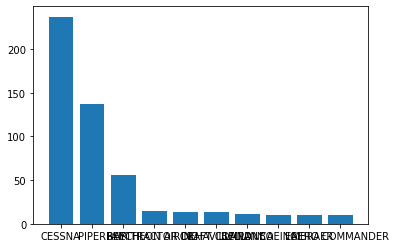

In [28]:
#accidents per year
fig, ax = plt.subplots()

commercial_flights_df = df[(df['flight_category'] == "Commercial")]

accidents_per_model_commercial = commercial_flights_df['Makes_Standardized'].value_counts()[:10]

x = accidents_per_model_commercial.index
y = accidents_per_model_commercial.values

ax.bar(x, y)

print(accidents_per_model_commercial)



CESSNA                5558
PIPER                 3254
BEECH                 1085
MOONEY                 323
MAULE                  199
BELLANCA               198
AERONCA                197
CIRRUS DESIGN CORP     189
CHAMPION               145
LUSCOMBE               140
Name: Makes_Standardized, dtype: int64


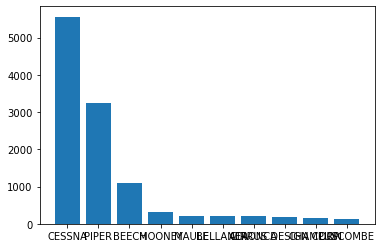

In [29]:
#accidents per year
fig, ax = plt.subplots()

personal_flights_df = df[(df['flight_category'] == "Private")]

accidents_per_model_personal = personal_flights_df['Makes_Standardized'].value_counts()[:10]

x = accidents_per_model_personal.index
y = accidents_per_model_personal.values

ax.bar(x, y)

print(accidents_per_model_personal)


## Conclusions

We dont need a separate report for commercial and private. We just need to examine each brand by how many fatalities and injuries they are having on average as well as damage sustained to the planes. 

We will also look into engines and see if the number of engines and engine type has anthing to do with injury severity. 

## Next Steps

Conclusion 